In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from quantumnetworks import MultiModeSystem, plot_full_evolution, MultiModeSystem, time_func, MultiModeError
import numpy as np
from timeit import timeit

# Single Mode System

In [3]:
# single mode system
omegas = [2*np.pi*1]
kappas = [2*np.pi*0.1]
gammas = [2*np.pi*0.2]
kerrs = [2*np.pi*0.001]
couplings = []
system = MultiModeSystem(params={"omegas":omegas, "kappas":kappas,"gammas":gammas,"kerrs":kerrs,"couplings":couplings})
x_0 = np.array([1,0])
ts = np.linspace(0, 1, 1001)

In [4]:
X = system.trapezoidal(x_0, ts)

In [5]:
a = {1:2,3:4.5}
for j, (key,val) in enumerate(a.items()):
    print(j, key, val)

0 1 2
1 3 4.5


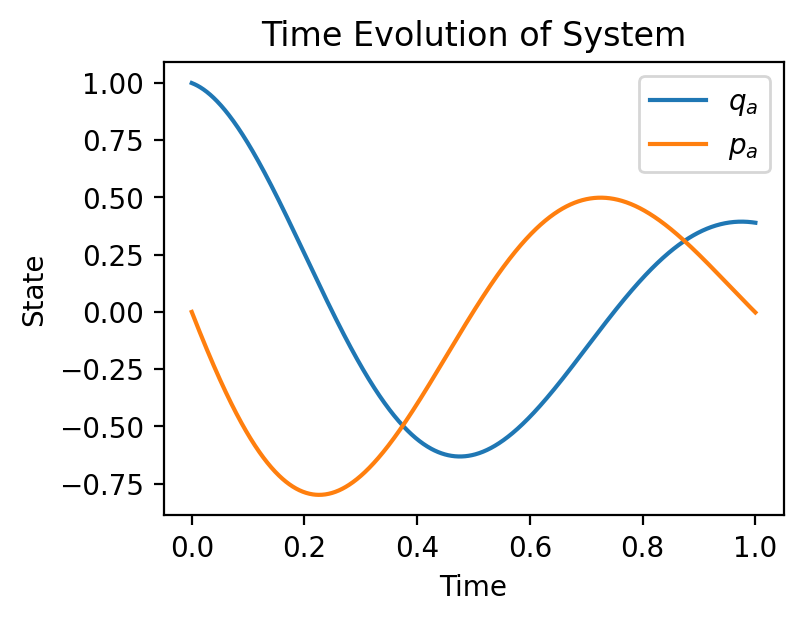

In [6]:
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

## Error Analysis

In [7]:
params_error = {"omegas":[2*np.pi*.05], 
                "kappas":[2*np.pi*.05], 
                "gammas":[2*np.pi*0.05], 
                "kerrs":[2*np.pi*0.001], 
                "couplings":[]}
error_analysis = MultiModeError(system, params_error)

Using the `MultiModeError` analysis class, we can sample different values for each omega given the uncertainty (i.e. 1 standard deviation) in each omega measurement and assuming a gaussian distribution. 

In [8]:
error_analysis.run("trapezoidal", x_0, ts, num_samples=100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.78it/s]


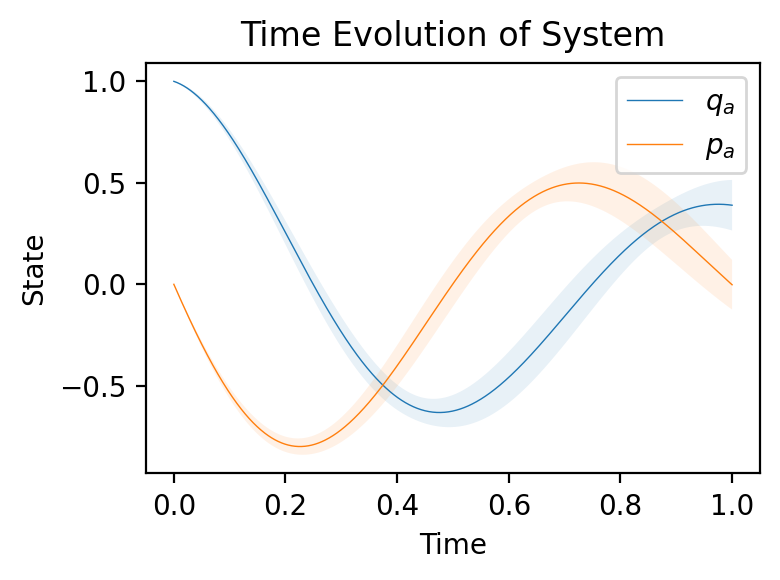

In [9]:
_ = error_analysis.plot(ts, labels=["$q_a$","$p_a$"], lw=.5)

# MultiMode Example

In [10]:
omegas = [2*np.pi*1,2*np.pi*2,2*np.pi*.5]
kappas = [2*np.pi*0.05,2*np.pi*0.1,2*np.pi*0.05]
gammas = [2*np.pi*0.05,2*np.pi*0.1,2*np.pi*0.1]
kerrs = [2*np.pi*0.01, 2*np.pi*0.01, 2*np.pi*0.01]
couplings = [[0,1,2*np.pi*0.01],[1,2,2*np.pi*0.01]]
system_multi = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs":kerrs, "couplings":couplings})

x_0 = np.array([1,0, 0,1, 1,0])
ts = np.linspace(0, 1, 1001)

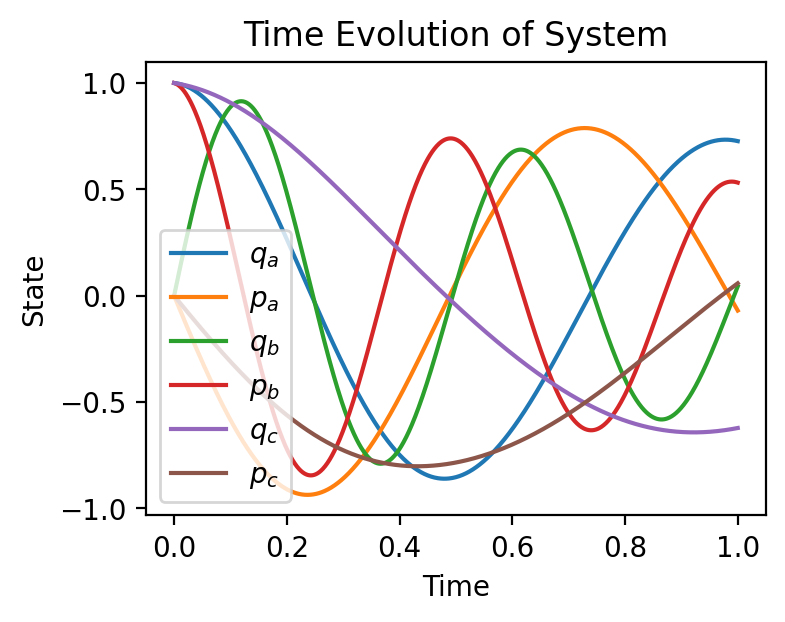

In [11]:
X = system_multi.trapezoidal(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$", "$q_b$","$p_b$", "$q_c$","$p_c$"])
ax.legend()

In [12]:
percent_error = .05
params_error = {"omegas":system_multi.params["omegas"]*percent_error, 
                "kappas":system_multi.params["kappas"]*percent_error, 
                "gammas":system_multi.params["gammas"]*percent_error, 
                "kerrs":system_multi.params["kerrs"]*percent_error, 
                "couplings":[[c[0], c[1], c[2]*percent_error] for c in system_multi.params["couplings"]]}
error_analysis_multi = MultiModeError(system_multi, params_error)

In [13]:
error_analysis_multi.run("trapezoidal", x_0, ts, num_samples=100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.10it/s]


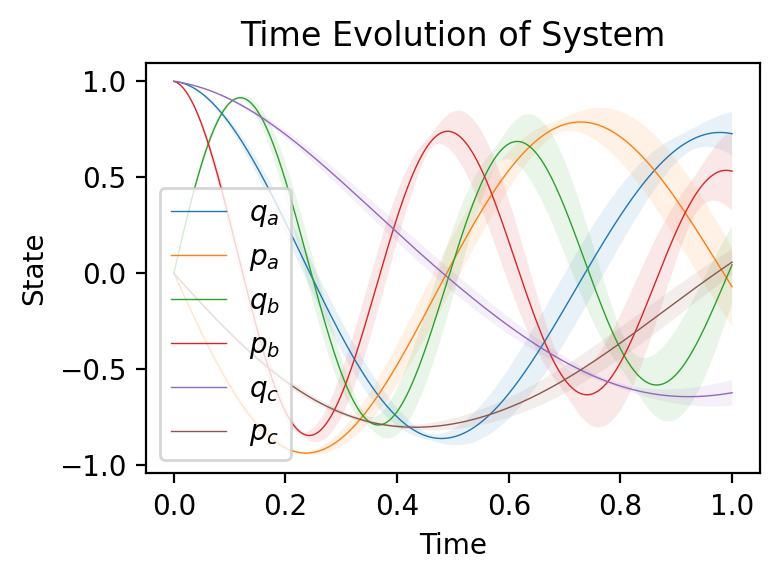

In [14]:
fig,ax = error_analysis_multi.plot(ts, labels=["$q_a$","$p_a$", "$q_b$","$p_b$", "$q_c$","$p_c$"], lw=.5)